In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob

def eigenvalue_parse(filename):
    eig = []
    transition_matrix = []
    with open(filename,'r') as f:
        for line in f:
            if line.split()[0]!='#':
                eig.append(float(line.split()[0]))
                transition_matrix.append(float(line.split()[1]))
    return eig, transition_matrix


def eigenvalue_noeh_parse(filename):
    ik = []
    ic = []
    iv = []
    iss = []
    ec = []
    ev = []
    eig = []
    transition_matrix = []
    with open(filename,'r') as f:
        for line in f:
            if line.split()[0]!='#':
                ik.append(int(line.split()[0]))
                ic.append(int(line.split()[1]))
                iv.append(int(line.split()[2]))
                iss.append(int(line.split()[3]))
                ec.append(float(line.split()[4]))
                ev.append(float(line.split()[5]))
                eig.append(float(line.split()[6]))
                transition_matrix.append(float(line.split()[7]))
    return eig, transition_matrix

1.616062062
[(10, 1.433554), (12, 1.4309804), (14, 1.4295095), (16, 1.4283341)]
(10, 12, 14, 16)
(1.433554, 1.4309804, 1.4295095, 1.4283341)
The errors are in meV:
[5.219899999999944, 2.6462999999998793, 1.1753999999999376, 0.0]
The exciton binding energyies are in meV:
[182.5080619999999, 185.081662, 186.5525619999999, 187.72796199999985]


//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


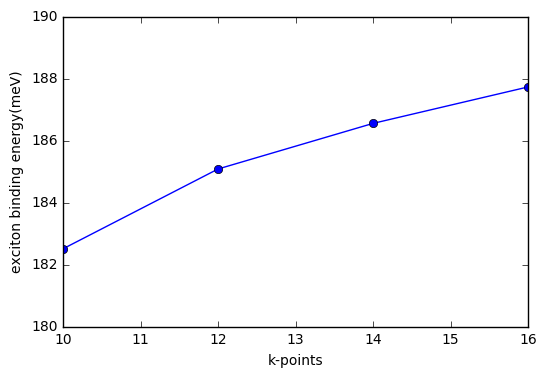

In [6]:
#QP_gap = 3.253854615 #silicon
#QP_gap = 2.545656-1.625454 #CsSnI3
QP_gap = 1.183465058-(-0.432597004)#Cs2SnI6
print(QP_gap)

#directory = '/Users/yao/Google Drive/data/BGW-test/Si/convergence/Bands_fine/'
#directory = '/Users/yao/Google Drive/data/BGW-test/Si/convergence/Bands_coarse/'
#directory = '/Users/yao/Google Drive/data/BGW-test/Si/convergence/K_fine/'
#directory = '/Users/yao/Google Drive/data/BGW-test/Si/convergence/K_coarse/'
directory='/Users/yao/Google Drive/data/BGW-test/Cs2SnI6/convergence/K_fine/'
filenames = glob.glob(directory+'eigenvalues.*')
k_grid = []
exciton_1 = []
exciton_1_error = [] #in meV
exciton_binding = []
for filename in filenames:
    eig, transition_matrix = eigenvalue_parse(filename)
    k_grid.append(int(filename.split('.')[1]))
    exciton_1.append(eig[0])
    
zipped = list(zip(k_grid, exciton_1))
print(zipped)
zipped.sort(key = lambda t: t[0])
k_grid, exciton_1 = zip(*zipped)

for i in range(len(exciton_1)):
    exciton_1_error.append((exciton_1[i]-exciton_1[-1])*1000)
    exciton_binding.append((QP_gap-exciton_1[i])*1000)
    
print(k_grid)
print(exciton_1)
print('The errors are in meV:')
print(exciton_1_error)
print('The exciton binding energyies are in meV:')
print(exciton_binding)

plt.plot(k_grid,exciton_binding,'o-')
plt.ylim([180, 190])
plt.legend()
plt.xlabel('k-points')
plt.ylabel('exciton binding energy(meV)')
plt.savefig(directory+'exciton_convergence.eps')
plt.show()

In [10]:
185.081662 - 182.5080619999999

2.5736000000000843

In [11]:
186.5525619999999 - 185.081662

1.470899999999915

In [12]:
187.72796199999985 - 186.5525619999999

1.1753999999999394